# Индикаторы сердечно-сосудистых заболеваний

### Описание задачи

#### По данным CDC, болезни сердца являются одной из основных причин смерти людей большинства рас в США (афроамериканцев, американских индейцев и коренных жителей Аляски, а также белых людей).  
#### Около половины всех американцев (47%) имеют хотя бы 1 из 3 основных факторов риска сердечно-сосудистых заболеваний: высокое кровяное давление, высокий уровень холестерина и курение. Другие ключевые показатели включают диабетический статус, ожирение (высокий индекс массы тела), недостаточную физическую активность или употребление слишком большого количества алкоголя.  
#### Выявление и предотвращение факторов, оказывающих наибольшее влияние на развитие сердечно-сосудистых заболеваний, очень важно в здравоохранении. Вычислительные разработки, в свою очередь, позволяют применять методы машинного обучения для выявления "закономерностей" из данных, которые могут предсказать состояние пациента.

### Цель работы

На основе имеющегося датасета построить модель классификации наличия сердечно-сосудистых заболеваний, используя методы машинного обучения.

### Описание датасета

Данные ежегодного обследования CDC за 2020 год 400 тысяч взрослых, касающиеся состояния их здоровья.  
Первоначально набор данных поступил из CDC и является основной частью Системы наблюдения за поведенческими факторами риска (BRFSS), которая проводит ежегодные телефонные опросы для сбора данных о состоянии здоровья жителей США. По описанию CDC: "Созданная в 1984 году в 15 штатах, BRFSS теперь собирает данные во всех 50 штатах, а также в округе Колумбия и трех территориях США. Ежегодно BRFSS проводит более 400 000 опросов взрослого населения, что делает его крупнейшей в мире системой непрерывного обследования здоровья".  
Самый последний набор данных (по состоянию на 15 февраля 2022 года) включает данные за 2020 год. Он состоит из 401 958 строк и 279 столбцов. Подавляющее большинство столбцов - это вопросы, задаваемые респондентам о состоянии их здоровья, такие как "Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице?" или "Выкурили ли вы за всю свою жизнь не менее 100 сигарет?".  
В этом наборе данных множество различных факторов (вопросов), которые прямо или косвенно влияют на сердечно-сосудистые заболевания, поэтому он был отформатирован автором: выбраны наиболее значимые переменные и проведена некоторая очистка, чтобы его можно было использовать для проектов машинного обучения.  

Ссылка на датасет - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### Подготовительный этап

##### Импортируем все необходимые библиотеки для решения задачи и загрузим датасет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import random

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

%matplotlib inline
random.seed()

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/igulyaevv/ML/main/heart_2020_cleaned.csv")

In [3]:
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Описание признаков датасета

- **HeartDisease** - Наличии ишемической болезни сердца или инфаркта миокарда
- **BMI** - Индекс массы тела
- **Smoking** - Признак курения (не менее 100 сигарет за всю жизнь)
- **AlcoholDrinking** - Признак алкоголизма (мужчины, выпивающие более 14 напитков в неделю, и женщины, выпивающие более 7 напитков в неделю)
- **Stroke** - Признак перенесенного инсульта
- **PhysicalHealth** - Количество дней за последний месяц, когда физическое здоровье было плохим (включает в себя физические заболевания и травмы)
- **MentalHealth** - Количество дней за последний месяц, когда психическое здоровье было плохим
- **DiffWalking** - Проблемы при ходьбе или подъеме по лестнице
- **Sex** - Пол
- **AgeCategory** - Четырнадцати-уровневая возрастная категория
- **Race** - Раса
- **Diabetic** - Степень диабета
- **PhysicalActivity** - Наличие физической активности, помимо работы, за последний месяц
- **GenHealth** - Категория удовлетворенности своим здоровьем
- **SleepTime** - Среднее количество часов сна
- **Asthma** - Наличие астмы
- **KidneyDisease** - Наличие заболевания почек (не считая камней в почках, инфекции мочевого пузыря или недержания мочи)
- **SkinCancer** - Наличие рака кожи

### Характеристики датасета

##### Выведем некоторую сводную информацию о датасете.

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
heart_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
heart_df.index

RangeIndex(start=0, stop=319795, step=1)

In [7]:
heart_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
heart_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [9]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
heart_df.describe(include=['object'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [11]:
heart_df.mean(numeric_only=True)

BMI               28.325399
PhysicalHealth     3.371710
MentalHealth       3.898366
SleepTime          7.097075
dtype: float64

In [12]:
heart_df.std(numeric_only=True)

BMI               6.356100
PhysicalHealth    7.950850
MentalHealth      7.955235
SleepTime         1.436007
dtype: float64

### Визуализация данных.

##### Построим круговую диаграмму распределения наличия сердечно-сосудистых заболеваний в текущем датасете.

In [13]:
colors = sns.color_palette('deep')[0:5]

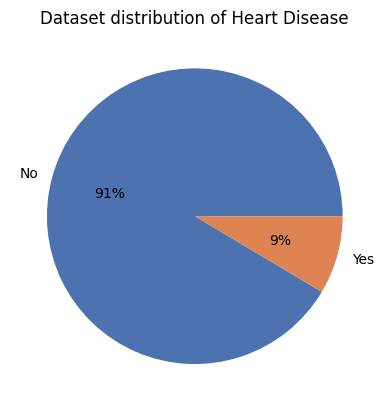

In [14]:
hd_groups = heart_df.groupby('HeartDisease').size()
plt.pie(x=hd_groups, labels=hd_groups.index, colors=colors, autopct='%.0f%%')
plt.title('Dataset distribution of Heart Disease')
pass

##### Датасет представлен двумя несбалансированными классами, их соотношение - 91% к 9%.

##### Посмотрим какие возрастные категории чаще встречаются в датасете.

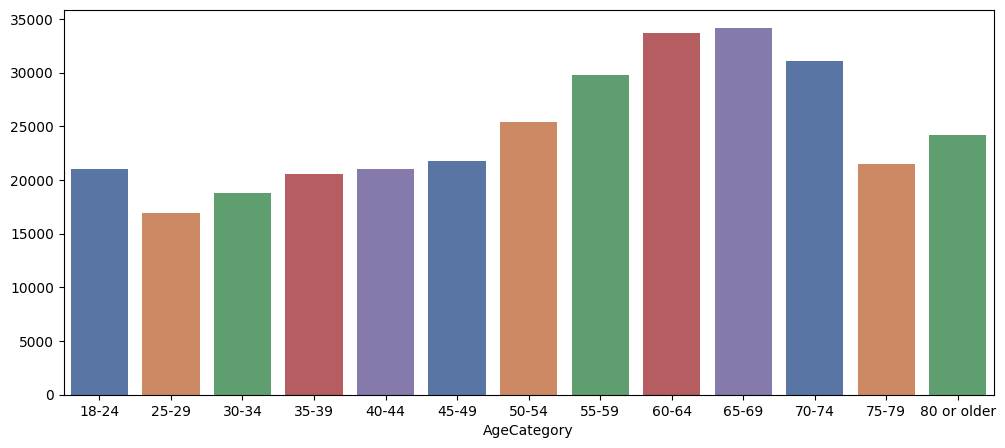

In [15]:
ac_groups = heart_df.groupby('AgeCategory').size()
plt.figure(figsize=(12, 5))
sns.barplot(x=ac_groups.index, y=ac_groups, palette=colors)
pass

##### Как видно из гистограммы, чаще в опросах участвовали люди, близкие к пожилому возрасту.

##### Теперь узнаем, кто чаще подвергается сердечно-сосудистым заболеваниям.

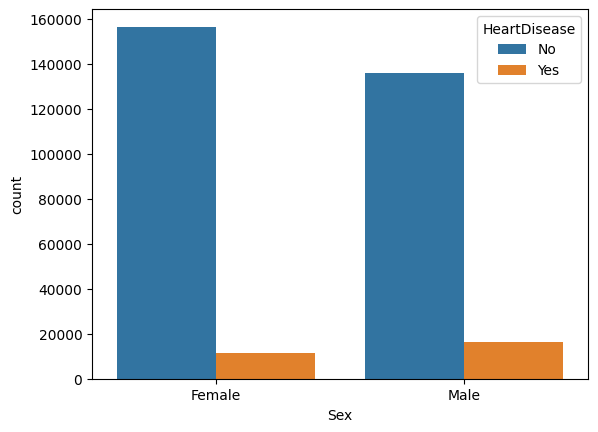

In [16]:
sns.countplot(data=heart_df, x='Sex', hue='HeartDisease')
pass

##### Вернемся к гистограмме распределения по возрастам и применим к ней аналогичную логику, какая возрастная категория чаще подвергается сердечно-сосудистым заболеваниям, уточним зависимость от возраста.

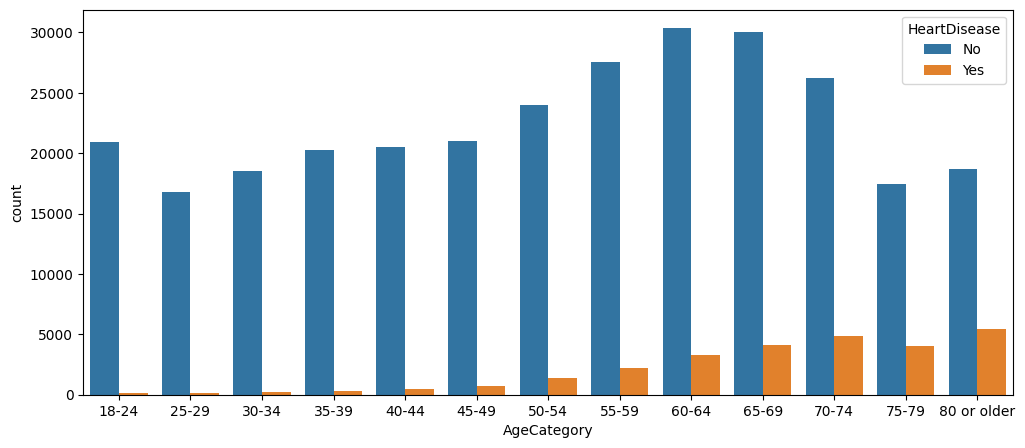

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(data=heart_df, x='AgeCategory', hue='HeartDisease', order=np.sort(heart_df['AgeCategory'].unique()))
pass

##### По гистограмме видно, что пожилые люди чаще сталкиваются с сердечными заболеваниями.

##### Построим график зависимости ментального здоровья от времени сна.

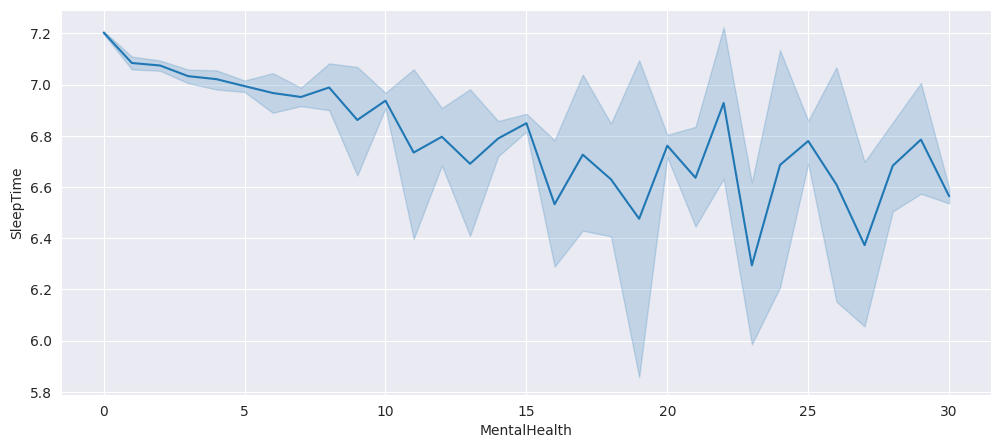

In [18]:
plt.figure(figsize=(12, 5))
sns.set_style("darkgrid")
sns.lineplot(data=heart_df, x="MentalHealth", y="SleepTime")
pass

##### По графику можно увидеть, что люди, имеющие проблемы с ментальным здоровьем, также сталкиваются с уменьшением времени сна и бессонницами.

##### Построим корреляционную матрицу.

In [19]:
corr_matrix = heart_df.corr(numeric_only=True)
corr_matrix

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


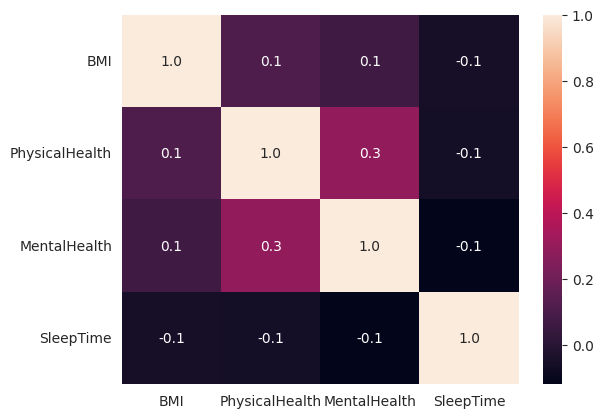

In [20]:
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
pass

##### Из всех имеющихся числовых признаков видно, что корреляция почти незначительна, и наибольшее значение достигается между физическим и ментальным здоровьем. Существует слабая тенденция того, что когда человек болен физически, он также плохо чувствует себя психически (возможно и наоборот), что звучит вполне логично.

### Обработка исходного датасета.

##### Из предыдущего пункта (см. Характеристики исходного датасета) видно, что данным требуется обработка.

##### Т.к. исходный датасет не имеет пропущенных значений, сделаем их имитацию. Для этого введем зануляющую функцию и применим ее к последним четырем столбцам случайным образом, образовав < 10% пропусков. Т.к. это действие случайно, то при каждом новом запуске данного ноутбука будут получаться новые датасеты.

In [21]:
def delete_value(df: pd.DataFrame, col_count: int = 4):
    df.iloc[random.randint(0, len(df) - 1), random.randint(len(df.columns) - col_count, len(df.columns) - 1)] = None

In [22]:
new_heart_df = heart_df.copy()

In [23]:
for i in range(int(len(new_heart_df) * 0.1)):
    delete_value(new_heart_df)

In [24]:
new_heart_df.isna().sum()

HeartDisease           0
BMI                    0
Smoking                0
AlcoholDrinking        0
Stroke                 0
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
AgeCategory            0
Race                   0
Diabetic               0
PhysicalActivity       0
GenHealth              0
SleepTime           7845
Asthma              7841
KidneyDisease       8066
SkinCancer          7820
dtype: int64

##### Получили ситуацию, когда датасет имеет пропущенные значения. Займемся их обработкой.

##### Уберем пропущенные значения с помощью функций медианы и моды. Медиану используем для количественных признаков, моду для объектных.

In [25]:
def fill_mode(df, field_name):
    df[field_name] = df[field_name].fillna(df[field_name].mode().iloc[0])
    
def fill_median(df, field_name):
    df[field_name] = df[field_name].fillna(df[field_name].median(axis = 0), axis = 0)

In [26]:
fill_mode(new_heart_df, 'Asthma')
fill_mode(new_heart_df, 'KidneyDisease')
fill_mode(new_heart_df, 'SkinCancer')

In [27]:
fill_median(new_heart_df, 'SleepTime')

In [28]:
new_heart_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

##### Выведем типы данных столбцов. Каждый объектный тип переопределим как категорию и выведем возможные значения, для этого введем новую функцию.

In [29]:
new_heart_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [30]:
def to_category(df: pd.DataFrame, field_name: str):
    df[field_name] = df[field_name].astype('category')
    print(field_name, ' - ', df[field_name].dtype.categories)

In [31]:
for col in new_heart_df.columns:
    if new_heart_df[col].dtype.name == 'object':
        to_category(new_heart_df, col)

HeartDisease  -  Index(['No', 'Yes'], dtype='object')
Smoking  -  Index(['No', 'Yes'], dtype='object')
AlcoholDrinking  -  Index(['No', 'Yes'], dtype='object')
Stroke  -  Index(['No', 'Yes'], dtype='object')
DiffWalking  -  Index(['No', 'Yes'], dtype='object')
Sex  -  Index(['Female', 'Male'], dtype='object')
AgeCategory  -  Index(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype='object')
Race  -  Index(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
       'White'],
      dtype='object')
Diabetic  -  Index(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'], dtype='object')
PhysicalActivity  -  Index(['No', 'Yes'], dtype='object')
GenHealth  -  Index(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype='object')
Asthma  -  Index(['No', 'Yes'], dtype='object')
KidneyDisease  -  Index(['No', 'Yes'], dtype='object')
SkinCancer  -  Index(['No', 'Yes'

##### Для каждой категории с бинарным набором значений проведем бинаризацию, для этого также введем новую функцию.

In [32]:
def to_binary(df: pd.DataFrame, field_name: str):
    df[field_name] = pd.factorize(df[field_name])[0]

In [33]:
binary = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking',
    'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]

for col in binary:
    to_binary(new_heart_df, col)

##### Для оставшихся категорий проведем фиктивную развертку (сразу переименуем фиктивные поля).

In [34]:
def to_dummies(df: pd.DataFrame, field_name: str, renamed_columns: dict):
    new_df = pd.get_dummies(df[field_name])
    df = pd.concat((df, new_df), axis=1)
    df = df.drop([field_name], axis=1)
    df.rename(columns=renamed_columns, inplace=True)
    
    return df

In [35]:
diabetic_categories = {
    'No': 'Diabetic - No',
    'No, borderline diabetes': 'Diabetic - borderline diabetes',
    'Yes': 'Diabetic - Yes',
    'Yes (during pregnancy)': 'Diabetic - during pregnancy',
}

race_categories = {'Other': 'Other Race'}

genhealth_categories = {
    'Excellent': 'Health - Excellent',
    'Fair': 'Health - Fair',
    'Good': 'Health - Good',
    'Poor': 'Health - Poor',
    'Very good': 'Health - Very good'
}

new_heart_df = to_dummies(new_heart_df, 'Diabetic', diabetic_categories)
new_heart_df = to_dummies(new_heart_df, 'Race', race_categories)
new_heart_df = to_dummies(new_heart_df, 'GenHealth', genhealth_categories)

##### Возрастную систему усредним по каждому отрезку и присвоим соответствующим обладателям получившиеся значения.

In [36]:
age_categories = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 74,
    '80 or older': 85,
}

new_heart_df['AgeCategory'] = new_heart_df['AgeCategory'].cat.rename_categories(age_categories)
new_heart_df['AgeCategory'] = new_heart_df['AgeCategory'].astype('int')

In [37]:
new_heart_df.dtypes

HeartDisease                        int64
BMI                               float64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
PhysicalHealth                    float64
MentalHealth                      float64
DiffWalking                         int64
Sex                                 int64
AgeCategory                         int64
PhysicalActivity                    int64
SleepTime                         float64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
Diabetic - No                       uint8
Diabetic - borderline diabetes      uint8
Diabetic - Yes                      uint8
Diabetic - during pregnancy         uint8
American Indian/Alaskan Native      uint8
Asian                               uint8
Black                               uint8
Hispanic                            uint8
Other Race                        

##### Теперь проведем нормализацию количественных признаков.

In [38]:
complete_heart_df = (new_heart_df - new_heart_df.mean(axis=0)) / new_heart_df.std(axis=0)

### Промежуточная статистика.

##### Выведем статистику датасета, прошедшего обработку.

In [39]:
complete_heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asian,Black,Hispanic,Other Race,White,Health - Excellent,Health - Fair,Health - Good,Health - Poor,Health - Very good
0,-0.305954,-1.844747,-1.193472,-0.270319,-0.19804,-0.046751,3.281064,-0.401578,-0.951709,0.136547,...,-0.160877,-0.27798,-0.306399,-0.188098,0.551504,-0.514049,-0.348745,-0.640986,-0.191291,1.344884
1,-0.305954,-1.256336,0.837889,-0.270319,5.04947,-0.424069,-0.490038,-0.401578,-0.951709,1.685621,...,-0.160877,-0.27798,-0.306399,-0.188098,0.551504,-0.514049,-0.348745,-0.640986,-0.191291,1.344884
2,-0.305954,-0.274602,-1.193472,-0.270319,-0.19804,2.091385,3.281064,-0.401578,1.050738,0.689788,...,-0.160877,-0.27798,-0.306399,-0.188098,0.551504,-0.514049,2.867417,-0.640986,-0.191291,-0.743556
3,-0.305954,-0.647472,0.837889,-0.270319,-0.19804,-0.424069,-0.490038,-0.401578,-0.951709,1.077056,...,-0.160877,-0.27798,-0.306399,-0.188098,0.551504,-0.514049,-0.348745,1.560091,-0.191291,-0.743556
4,-0.305954,-0.726137,0.837889,-0.270319,-0.19804,3.097567,-0.490038,2.490170,-0.951709,-0.693314,...,-0.160877,-0.27798,-0.306399,-0.188098,0.551504,-0.514049,-0.348745,-0.640986,-0.191291,1.344884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,3.268460,-0.144019,-1.193472,-0.270319,-0.19804,0.456340,-0.490038,2.490170,1.050738,0.413167,...,-0.160877,-0.27798,3.263703,-0.188098,-1.813219,-0.514049,2.867417,-0.640986,-0.191291,-0.743556
319791,-0.305954,0.238291,-1.193472,-0.270319,-0.19804,-0.424069,-0.490038,-0.401578,1.050738,-0.969934,...,-0.160877,-0.27798,3.263703,-0.188098,-1.813219,-0.514049,-0.348745,-0.640986,-0.191291,1.344884
319792,-0.305954,-0.642752,0.837889,-0.270319,-0.19804,-0.424069,-0.490038,-0.401578,-0.951709,-0.416694,...,-0.160877,-0.27798,3.263703,-0.188098,-1.813219,-0.514049,-0.348745,1.560091,-0.191291,-0.743556
319793,-0.305954,0.705559,0.837889,-0.270319,-0.19804,-0.424069,-0.490038,-0.401578,-0.951709,-1.523175,...,-0.160877,-0.27798,3.263703,-0.188098,-1.813219,-0.514049,-0.348745,1.560091,-0.191291,-0.743556


In [40]:
complete_heart_df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asian,Black,Hispanic,Other Race,White,Health - Excellent,Health - Fair,Health - Good,Health - Poor,Health - Very good
count,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,...,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05,3.197950e+05
mean,1.571973e-18,7.231296e-16,4.310427e-17,4.413744e-17,2.452944e-17,-1.553642e-17,-1.813045e-17,5.754642e-18,9.882875e-17,4.910331e-17,...,-1.188700e-17,-4.461514e-17,-8.709728e-17,5.452468e-17,4.870338e-17,6.433423e-17,-5.132518e-17,2.790668e-17,-2.262974e-17,7.594350e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.059536e-01,-2.565315e+00,-1.193472e+00,-2.703193e-01,-1.980400e-01,-4.240691e-01,-4.900378e-01,-4.015777e-01,-9.517094e-01,-1.855120e+00,...,-1.608774e-01,-2.779801e-01,-3.063995e-01,-1.880979e-01,-1.813219e+00,-5.140485e-01,-3.487448e-01,-6.409861e-01,-1.912913e-01,-7.435564e-01
25%,-3.059536e-01,-6.757915e-01,-1.193472e+00,-2.703193e-01,-1.980400e-01,-4.240691e-01,-4.900378e-01,-4.015777e-01,-9.517094e-01,-6.933141e-01,...,-1.608774e-01,-2.779801e-01,-3.063995e-01,-1.880979e-01,5.515036e-01,-5.140485e-01,-3.487448e-01,-6.409861e-01,-1.912913e-01,-7.435564e-01
50%,-3.059536e-01,-1.550319e-01,8.378891e-01,-2.703193e-01,-1.980400e-01,-4.240691e-01,-4.900378e-01,-4.015777e-01,-9.517094e-01,1.365471e-01,...,-1.608774e-01,-2.779801e-01,-3.063995e-01,-1.880979e-01,5.515036e-01,-5.140485e-01,-3.487448e-01,-6.409861e-01,-1.912913e-01,-7.435564e-01
75%,-3.059536e-01,4.868711e-01,8.378891e-01,-2.703193e-01,-1.980400e-01,-1.725237e-01,-1.129277e-01,-4.015777e-01,1.050738e+00,6.897879e-01,...,-1.608774e-01,-2.779801e-01,-3.063995e-01,-1.880979e-01,5.515036e-01,-5.140485e-01,-3.487448e-01,1.560091e+00,-1.912913e-01,1.344884e+00
max,3.268460e+00,1.046626e+01,8.378891e-01,3.699317e+00,5.049470e+00,3.349112e+00,3.281064e+00,2.490170e+00,1.050738e+00,1.685621e+00,...,6.215894e+00,3.597369e+00,3.263703e+00,5.316364e+00,5.515036e-01,1.945336e+00,2.867417e+00,1.560091e+00,5.227613e+00,1.344884e+00


In [41]:
complete_corr_matrix = complete_heart_df.corr(numeric_only=True)
complete_corr_matrix

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asian,Black,Hispanic,Other Race,White,Health - Excellent,Health - Fair,Health - Good,Health - Poor,Health - Very good
HeartDisease,1.000000,0.051803,-0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233392,...,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.116042,0.147954,0.039033,0.174662,-0.101886
BMI,0.051803,1.000000,-0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.006089,...,-0.078643,0.080672,0.023750,0.012535,-0.049060,-0.179993,0.127364,0.118047,0.062501,-0.065954
Smoking,-0.107764,-0.023118,1.000000,-0.111768,-0.061226,-0.115352,-0.085157,-0.120074,-0.085052,-0.127044,...,0.060308,0.038249,0.066873,-0.016205,-0.072367,0.117444,-0.095620,-0.059651,-0.086520,0.052305
AlcoholDrinking,-0.032080,-0.038816,-0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059585,...,-0.022275,-0.025980,-0.015554,0.005455,0.033342,0.015578,-0.018859,-0.007808,-0.017068,0.013005
Stroke,0.196835,0.019733,-0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137898,...,-0.016060,0.024819,-0.025823,0.005743,0.001154,-0.073916,0.104983,0.013159,0.133641,-0.069395
PhysicalHealth,0.170721,0.109788,-0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110596,...,-0.035229,0.011371,-0.005571,0.016102,-0.003968,-0.173037,0.303773,-0.037663,0.471919,-0.196462
MentalHealth,0.028591,0.064131,-0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155252,...,-0.023113,0.010944,0.011167,0.031385,-0.024489,-0.111877,0.151321,0.013353,0.192079,-0.089956
DiffWalking,0.201258,0.181678,-0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.244946,...,-0.038830,0.039615,-0.008214,0.008483,-0.015516,-0.173606,0.282517,0.031570,0.308767,-0.184986
Sex,0.070040,0.026940,-0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.068269,...,0.013716,-0.037280,-0.003607,0.008762,0.017314,0.021757,-0.022456,0.003642,-0.010667,-0.003239
AgeCategory,0.233392,-0.006089,-0.127044,-0.059585,0.137898,0.110596,-0.155252,0.244946,-0.068269,1.000000,...,-0.083535,-0.034788,-0.161751,-0.060870,0.193056,-0.143173,0.102246,0.059814,0.086131,-0.034764


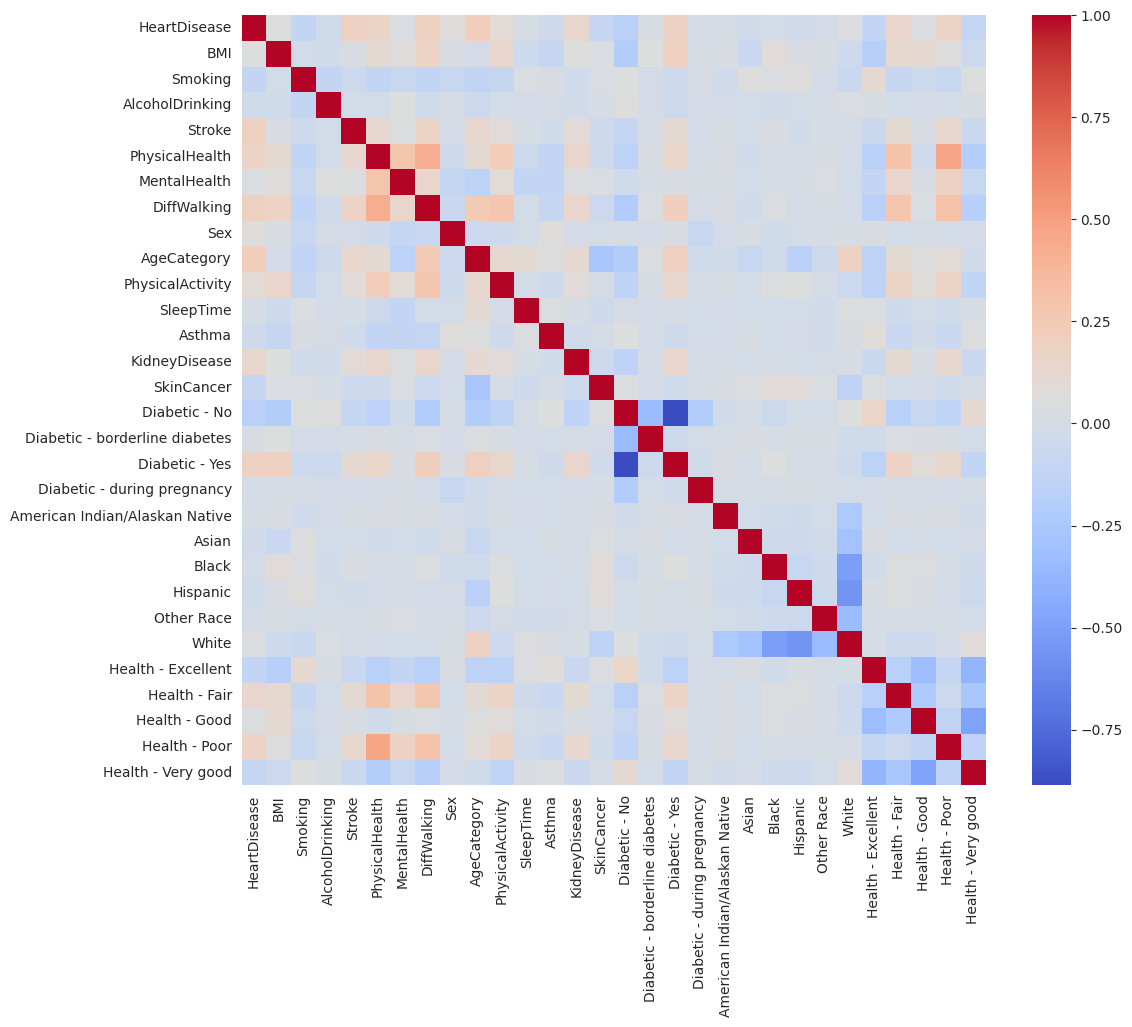

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(complete_corr_matrix, cmap='coolwarm')
pass

### Подготовка к обучению

##### Разбиваем датасет на обучающую и тестовую выборки.

In [43]:
X = complete_heart_df.drop('HeartDisease', axis=1)
y = new_heart_df['HeartDisease']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
X_train.shape

(223856, 29)

In [46]:
X_test.shape

(95939, 29)

### Метод ближайших соседей - kNN

##### Применим метод с параметром равным 1. Найдем ошибку функцией mean библиотеки numpy.

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [49]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(1, err_train, err_test)

1 0.003328032306482739 0.13138556791294467


In [50]:
errors_train = {1: err_train}
errors_test = {1: err_test}

##### Теперь обернем метод в цикл и посмотрим при каком значении количества соседей ошибка будет достигать минимальное значение, значения будем заносить в словарь. Ошибку будем находить функцией mean_squared_error из модуля metrics библиотеки sklearn.

In [51]:
for i in range(2, 20 + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    
    errors_train[i] = mean_squared_error(y_train, y_train_predict)
    errors_test[i] = mean_squared_error(y_test, y_test_predict)

In [52]:
errors_train

{1: 0.003328032306482739,
 2: 0.06539025087556286,
 3: 0.06507754985347723,
 4: 0.07443177757129583,
 5: 0.07453898935029662,
 6: 0.0776257951540276,
 7: 0.07763472946894433,
 8: 0.07934118361804017,
 9: 0.07938138803516546,
 10: 0.08048924308484025,
 11: 0.0805875205489243,
 12: 0.08118611964834536,
 13: 0.08098063040526053,
 14: 0.08138714173397184,
 15: 0.08117718533342863,
 16: 0.08164623686655707,
 17: 0.0814452147809306,
 18: 0.08185619326710028,
 19: 0.08168197412622401,
 20: 0.08215549281681081}

In [53]:
errors_test

{1: 0.13138556791294467,
 2: 0.09239204077590969,
 3: 0.1027840607052398,
 4: 0.09000510741200138,
 5: 0.09492490019700017,
 6: 0.08870219618716059,
 7: 0.09079727743670457,
 8: 0.08757648088889815,
 9: 0.08900447159132366,
 10: 0.08721166574594273,
 11: 0.08844161394219244,
 12: 0.08703446981936439,
 13: 0.08771198365628159,
 14: 0.08699277666016948,
 15: 0.08776410010527523,
 16: 0.08658626835801916,
 17: 0.08725335890513763,
 18: 0.08662796151721407,
 19: 0.08706573968876057,
 20: 0.0861276436068752}

In [54]:
def min_error(errors_dct: dict):
    key = min(errors_dct, key=errors_dct.get)
    print(key, errors_dct.get(key))

In [55]:
knn_min_train = min_error(errors_train)
knn_min_test = min_error(errors_test)

knn_min_train
knn_min_test

1 0.003328032306482739
20 0.0861276436068752


##### Мы видим, что минимальное значение ошибки достигает при параметре 1 на обучающей выборке и при 20 на тестовой выборке. 

### Метод случайного леса

##### Рассмотрим метод на единственном запуске для примера, параметр зададим равным 1000. 

In [56]:
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

err_train = mean_squared_error(y_train, rf.predict(X_train))
err_test  = mean_squared_error(y_test, rf.predict(X_test))

print(err_train, err_test)

0.002899185190479594 0.09570664693190464


### Выводы

##### В данной работе была описана задача классификации на основе датасета с индикаторами сердечно-сосудистых заболеваний. Из рассмотренных моделей (kNN, Random Forest) лучшим оказался - метод ближайшего соседа с параметром 20, с величиной ошибки на тестовой выборке - 0.0861276436068752. На обучающей выборке лучше показал метод Random Forest. Для уменьшения величины ошибки возможно стоит попробовать другие методы, либо выполнить дополнительные итерации по очистке данных.